In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

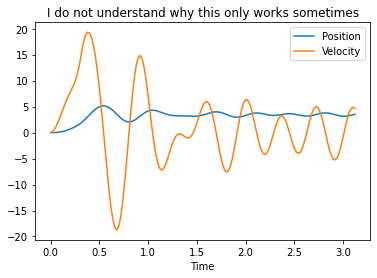

'd= 1.85, m = 0.2, c1 = 0.57, k1 = 22.25, k2 = 47.96, F = 47.11*sin(17.15t)'

In [37]:
# Generating system parameters
m = np.random.uniform(.1,.25) # mass
c1 = np.random.uniform(.1,1) # damper attached to mass
k1 = np.random.uniform(10,100) # spring attached to mass
a = np.random.uniform(10,50) # force amplitude
w = np.random.uniform(1,20) # force wavelength
k2 = np.random.uniform(10,100) #second spring
d = np.random.uniform(0,a/k1) # distance from x=0 to the second spring

t = np.arange(0,3.14,.02) # time

# Defining, solving, and graphing the DE:

def nonlinear(x,t):
    dx1dt = x[1]
    dx2dt = a*np.sin(w*t) - (c1*x[1] + np.heaviside(x[0]-d,1)*k2*(x[0]-d) - k1*x[0])/m
    dxdt = [dx1dt,dx2dt]
    
    return dxdt

x = odeint(nonlinear,[0,0],t)
    
x1 = x[:,0]
x2 = x[:,1]

plt.plot(t,x1)
plt.plot(t,x2)
plt.title('I do not understand why this only works sometimes')
plt.legend(['Position','Velocity'])
plt.xlabel('Time')
plt.show()

f'd= {round(d,2)}, m = {round(m,2)}, c1 = {round(c1,2)}, k1 = {round(k1,2)}, k2 = {round(k2,2)}, F = {round(a,2)}*sin({round(w,2)}t)'